## Used Car Price Prediction

If user can predict the price of the car based on input features. 

Prediction results can be used to give new seller the price suggestion based on market condition.

### Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

**Import data as a pandas Dataframe**

In [42]:
df = pd.read_csv('data/cardekho_dataset.csv', index_col=[0])

**Top 5 records**

In [43]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


**Shape of Dataset**

In [44]:
df.shape

(15411, 13)

**Summary of dataset**

In [45]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


**Datatypes of features**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


## Exploring Data

In [67]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(numerical_features)} features and they are : {numerical_features}")
print(f"we have {len(categorical_features)} features and they are : {categorical_features}")

we have 7 features and they are : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
we have 6 features and they are : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information

- **car_name**: Car's Full name, which includes brand and specific model name.
- **brand**: Brand Name of the particular car.
- **model**: Exact model name of the car of a particular brand.
- **seller_type**: Which Type of seller is selling the used car
- **fuel_type**: Fuel used in the used car, which was put up on sale.
- **transmission_type**: Transmission used in the used car, which was put on sale.
- **vehicle_age**: The count of years since car was bought.
- **mileage**: It is the number of kilometer the car runs per litre.
- **engine**: It is the engine capacity in cc(cubic centimeters)
- **max_power**: Max power it produces in BHP.
- **seats**: Total number of seats in car.
- **selling_price**: The sale price which was put up on website.

In [49]:
# Proportion of each unique values of categorical column 
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Maserati Quattroporte    0.006489
Isuzu MUX                0.006489
Force Gurkha             0.006489
Name: proportion, Length: 121, dtype: float64
---------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.1297

## Univariate Analysis

### Numerical Variables

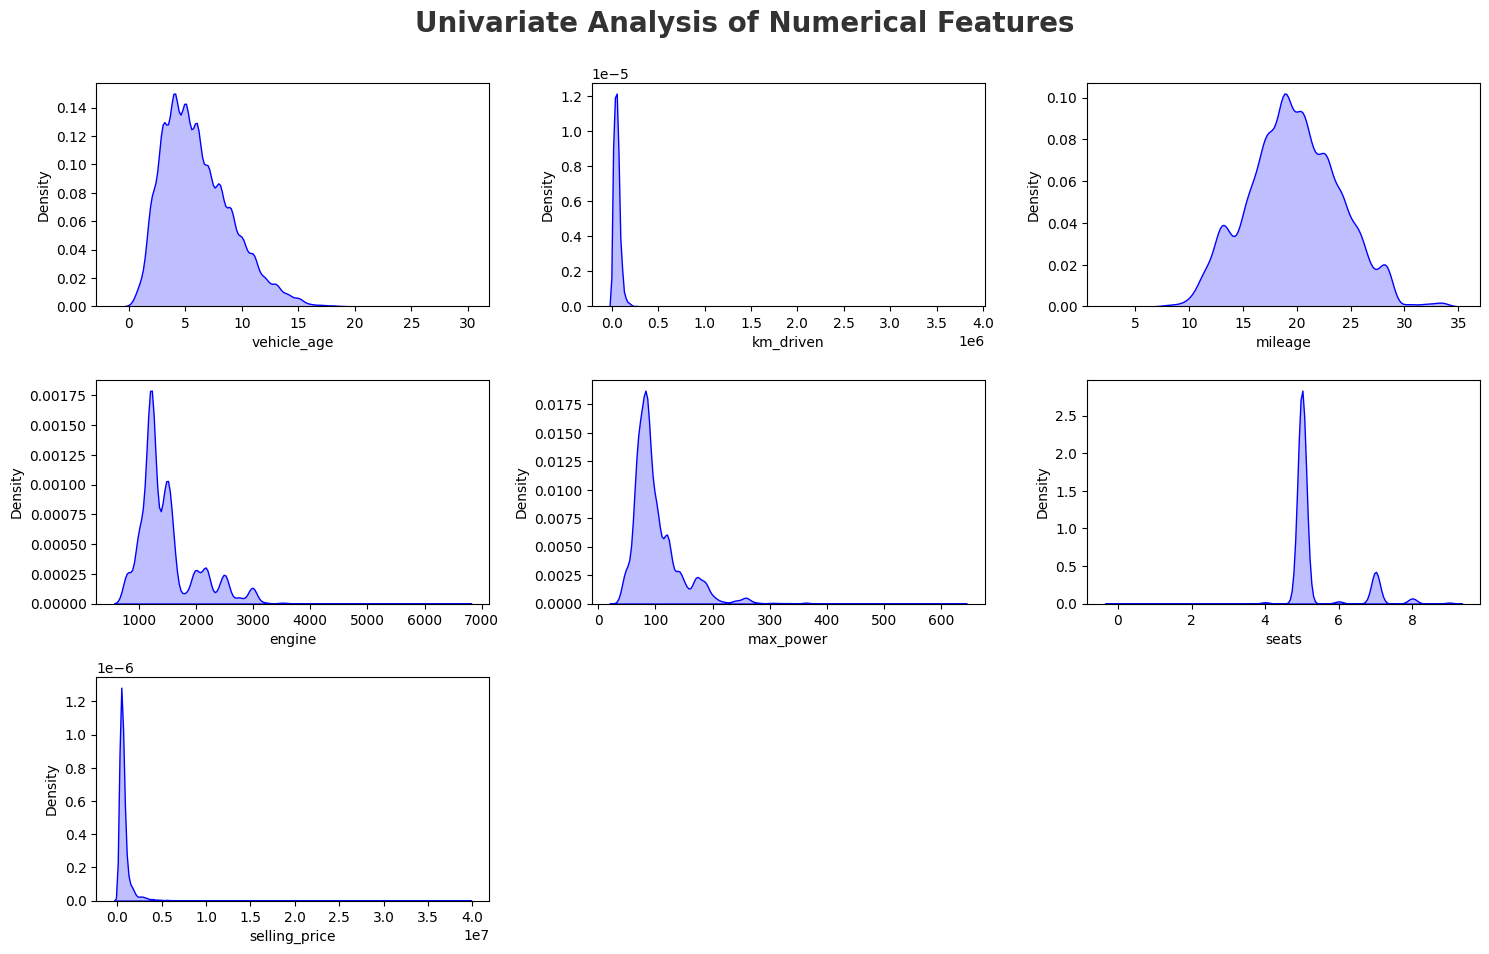

In [51]:
plt.figure(figsize = (15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]], shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Report**
- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, engine, selling_price, and max power.

### Categorical Features

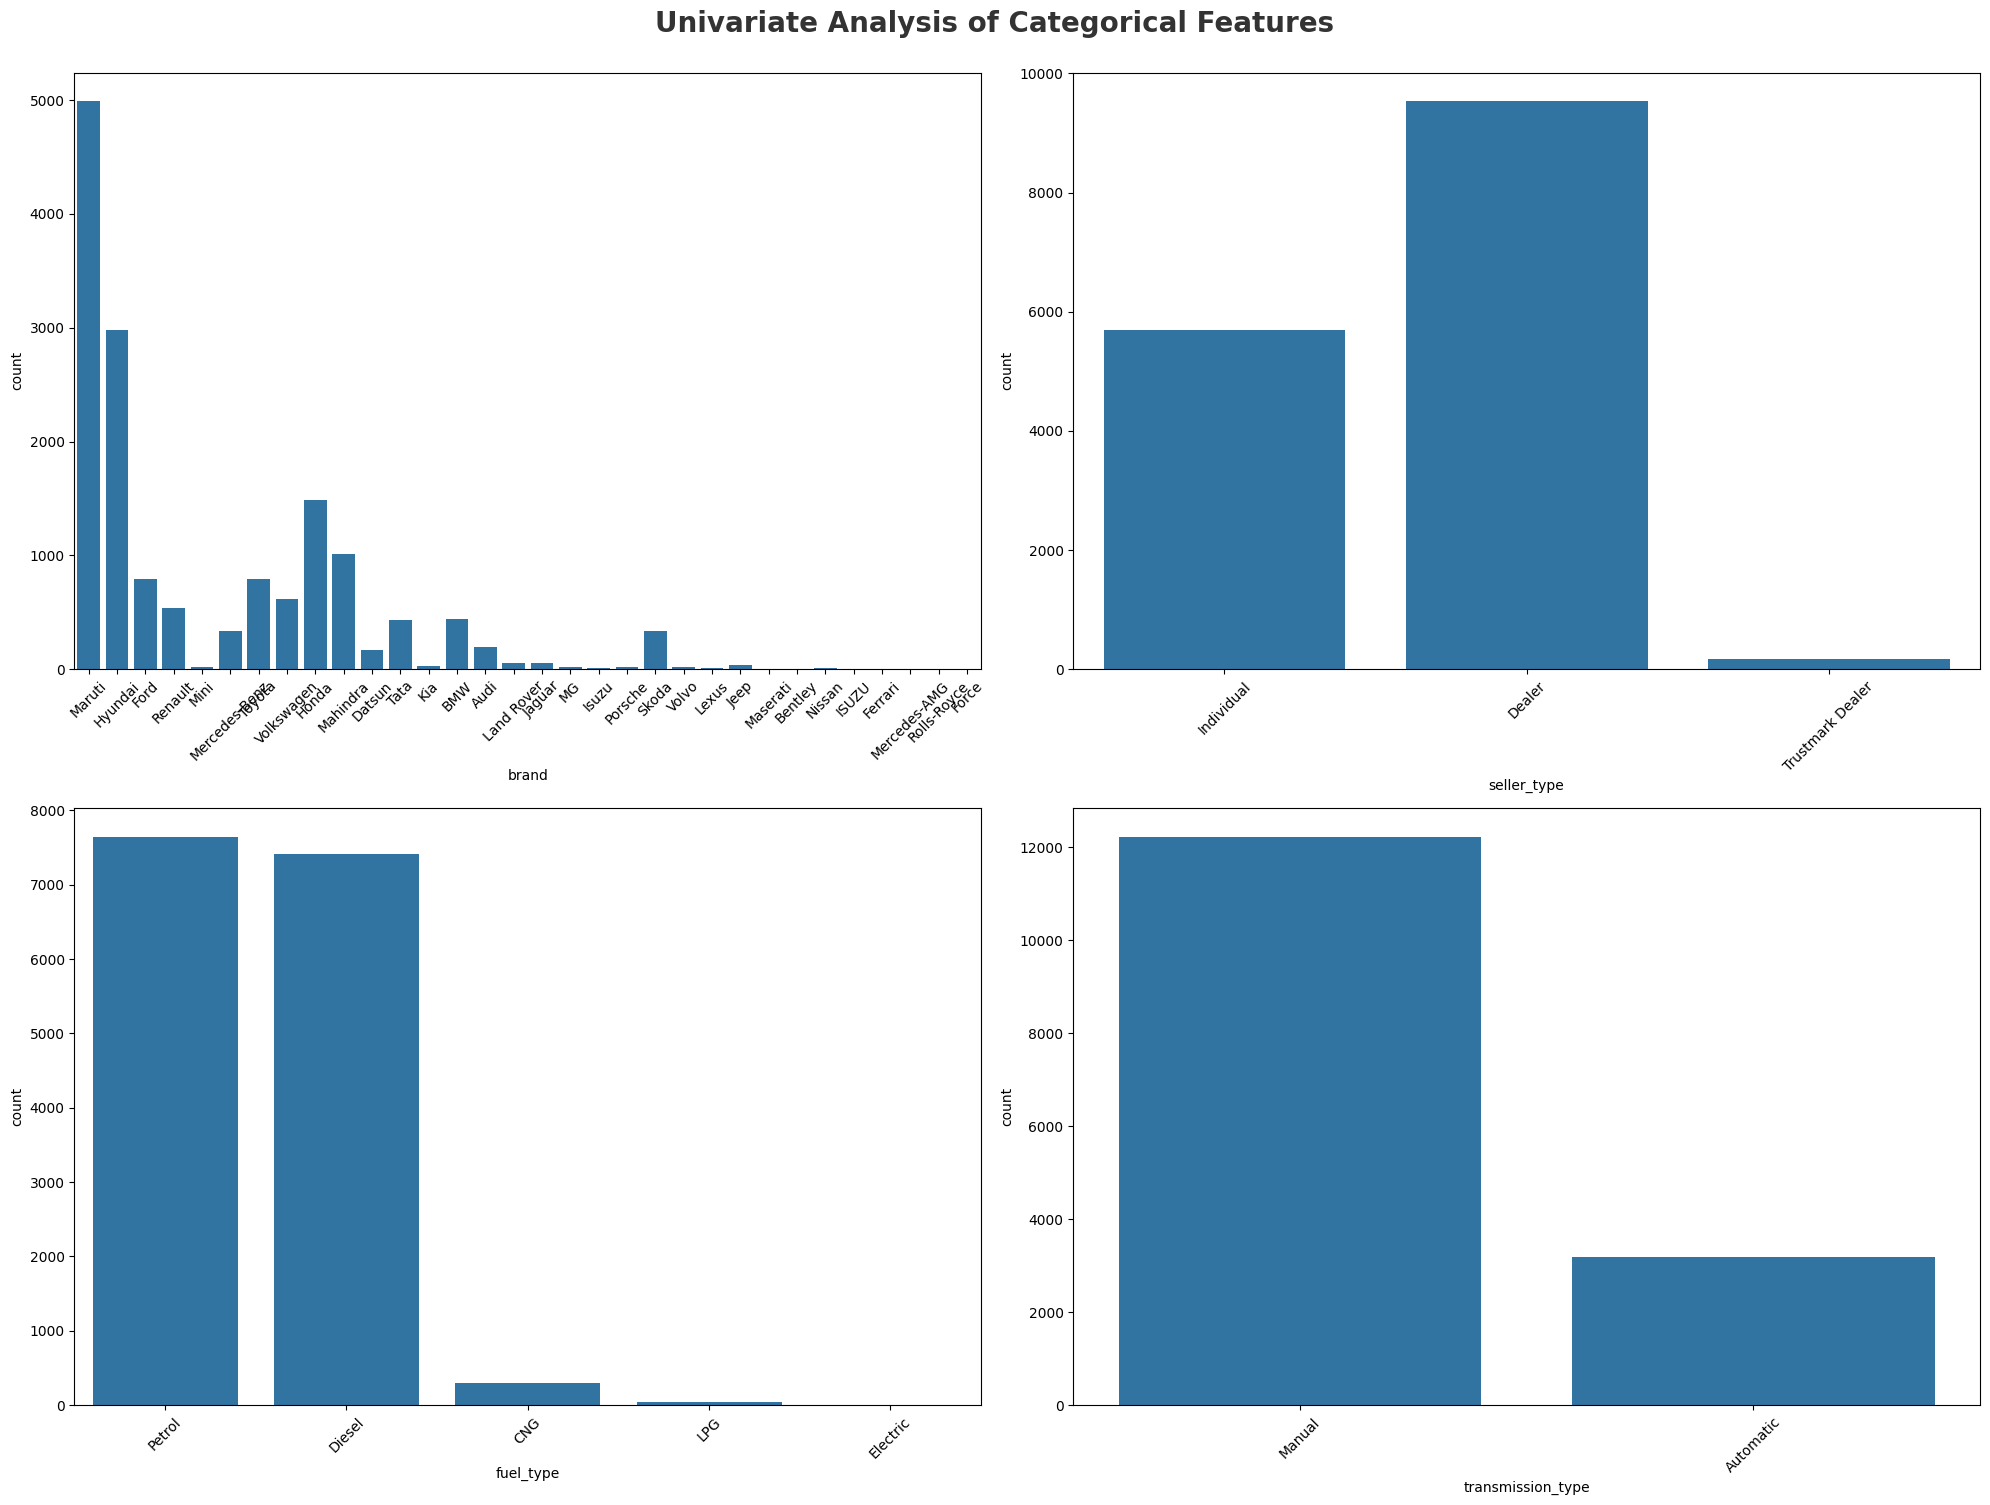

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# not visualizing categories with too many categories
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

### Check multicollinearity in numerical features

In [57]:
df[numerical_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


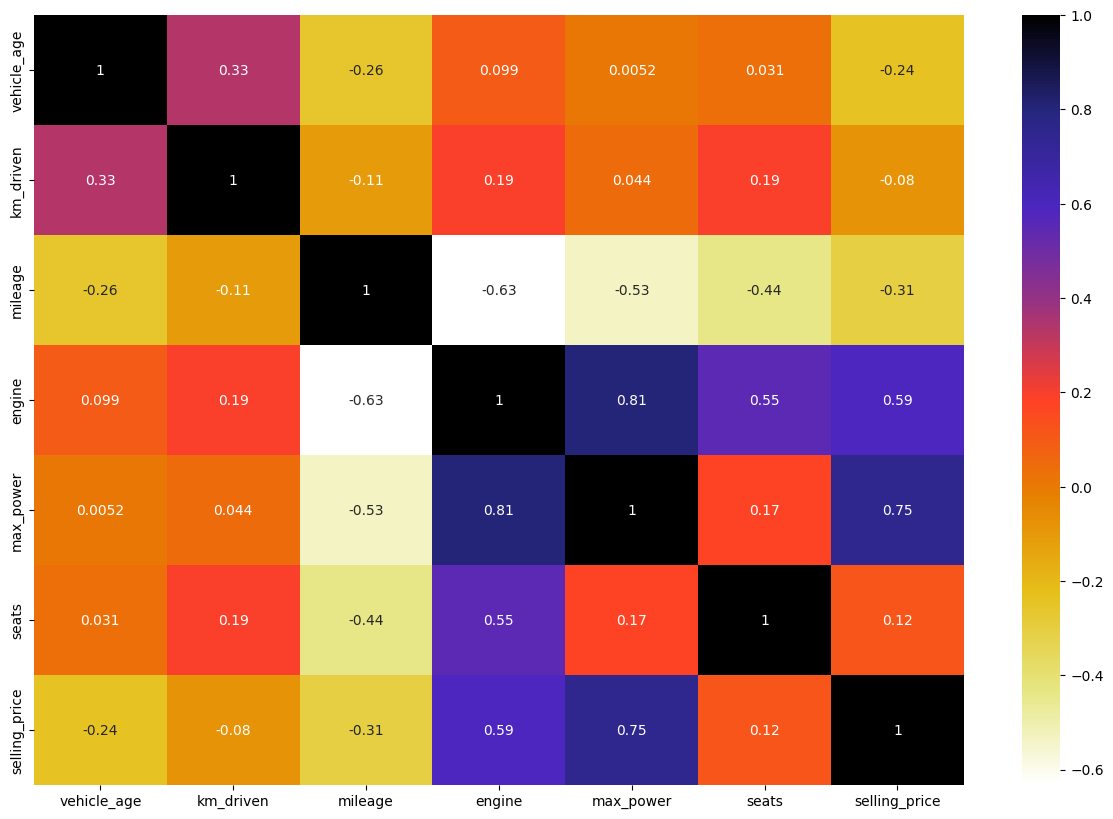

In [58]:
plt.figure(figsize = (15,10))
sns.heatmap(df[numerical_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Report**
 - `Mileage` and `engine` are negatively corelated
 - `Maxpower` and `selling_price` are highly positively corelated
 - `Km_driven` has the least corelation with `selling_price`

### Visualizing mean selling price WRT every categorical column

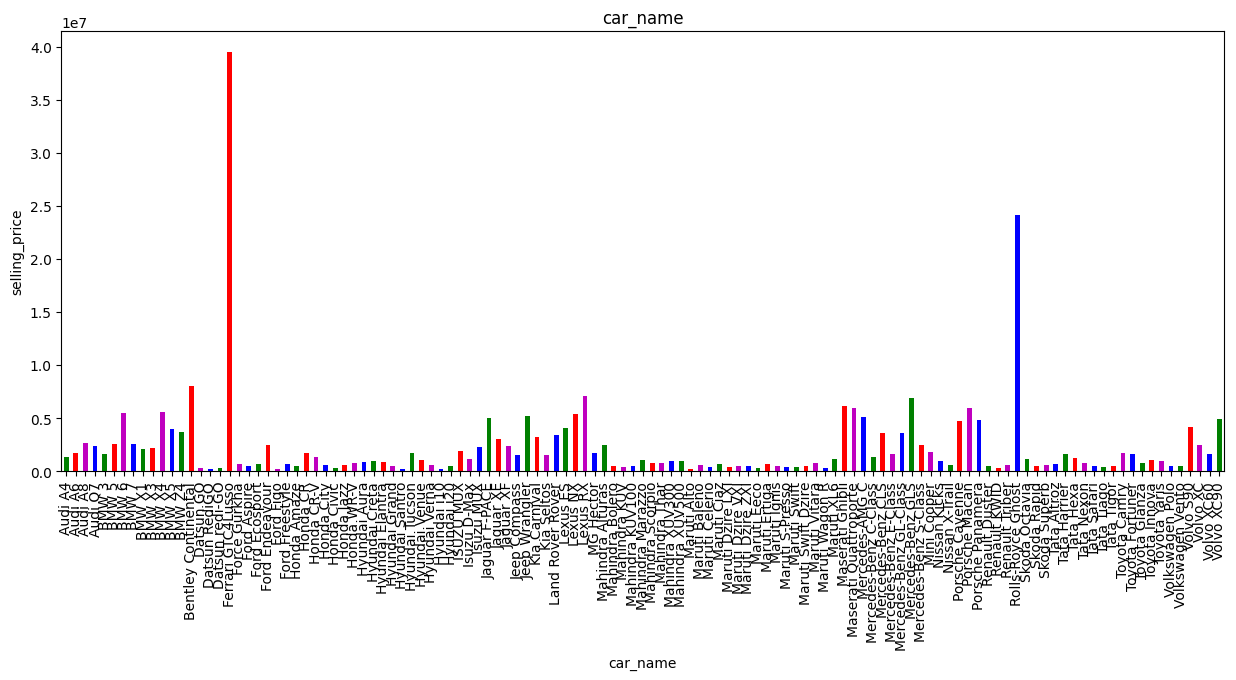

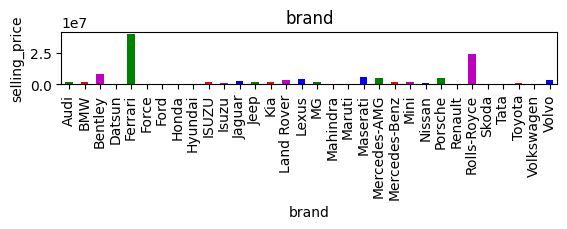

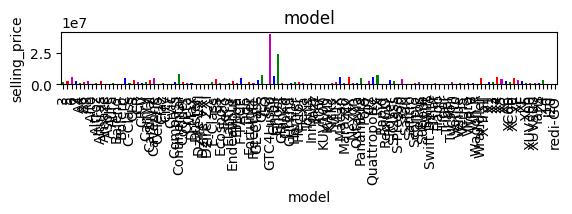

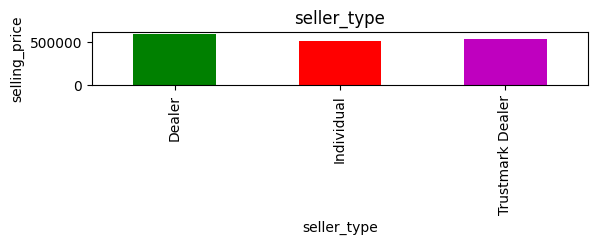

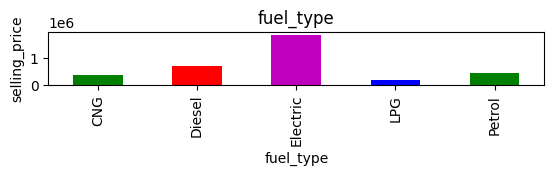

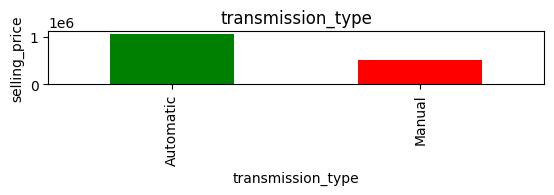

In [72]:
plt.figure(figsize=(15, 40))
colors = ['g', 'r', 'm', 'b']
for feature in categorical_features:
    data = df.copy()
    plt.subplot(6,1,i+1)
    data.groupby(feature)['selling_price'].median().plot.bar(color=colors)
    plt.xlabel(feature)
    plt.ylabel('selling_price')
    plt.title(feature)
    plt.show()

**Report**

Each Categorical features have different means WRT selling price which implies that each features have significant effiect on the selling price.

### Continous features 

In [73]:
continuous_features=[feature for feature in numerical_features if len(df[feature].unique())>=30]
print('Num of continues features :',continuous_features)

Num of continues features : ['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


ValueError: num must be an integer with 1 <= num <= 4, not 5

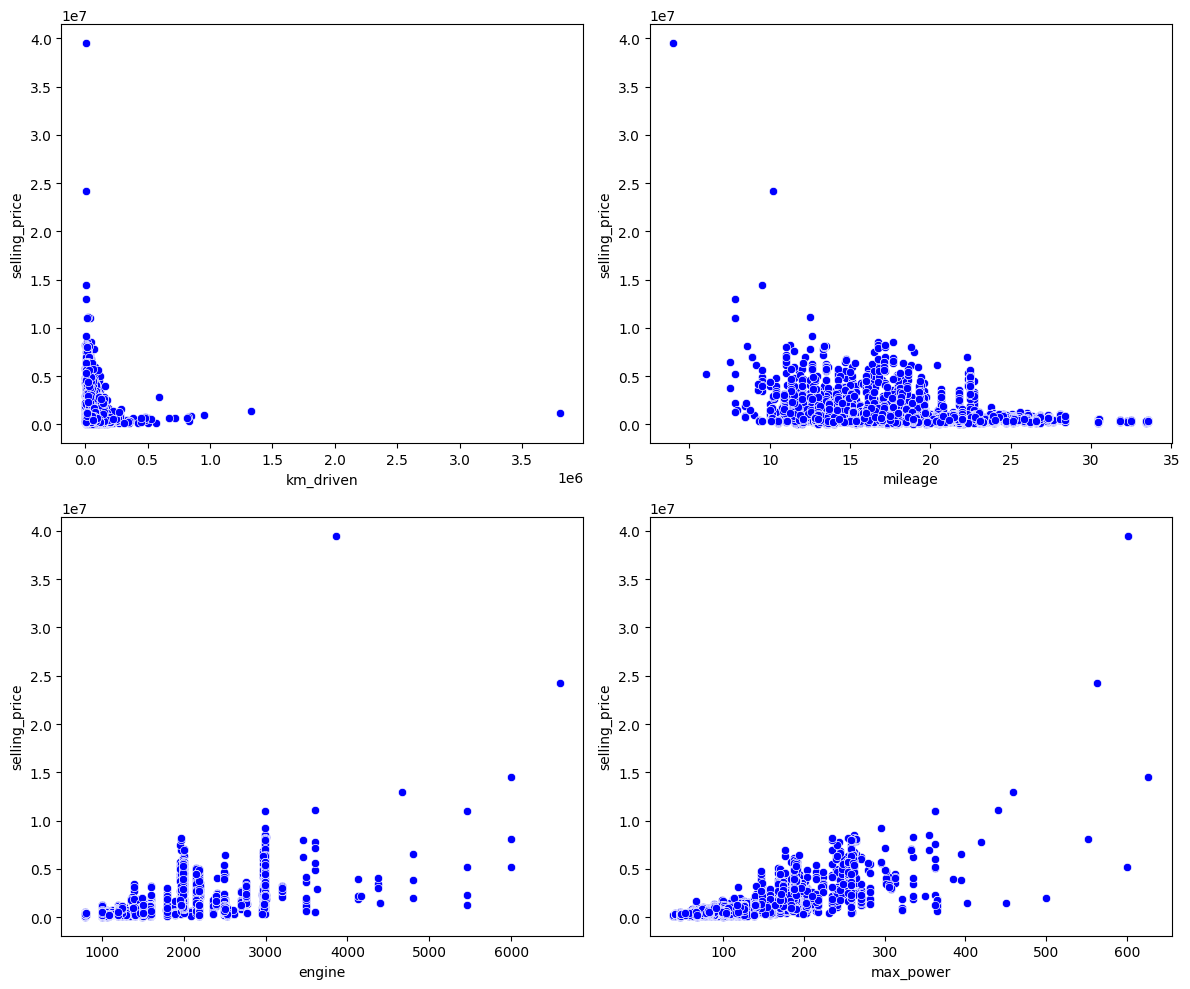

In [74]:
fig = plt.figure(figsize=(12, 10))

for i in range(len(continuous_features)):
    ax = plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, y='selling_price', x=continuous_features[i], color='b')
    plt.tight_layout()

## Initial Analysis Report
**Report**
 - `Lower Vehicle age` has more selling price than `Vehicle with more age`.
 - `Engine CC` has positive effect on price, Vehicle with 2000 cc and below are mostly priced below 5lakh.
 - `Kms Driven` has negative effect on `selling_price`.
 - `Vehicle Age` has negative effect on `selling_price`
 - No Null values in the dataset